In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# Завантаження даних та початковий аналіз
df = pd.read_csv('data/data.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [15]:
df.head(5)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [16]:
df.isnull().sum()


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [17]:
# обробка категоріальних змінних
df = pd.get_dummies(df, columns=['Extracurricular Activities'], drop_first=True)

df['Extracurricular Activities_Yes'] = df['Extracurricular Activities_Yes'].astype(int)
print(df['Extracurricular Activities_Yes'].unique())

[1 0]


<Axes: >

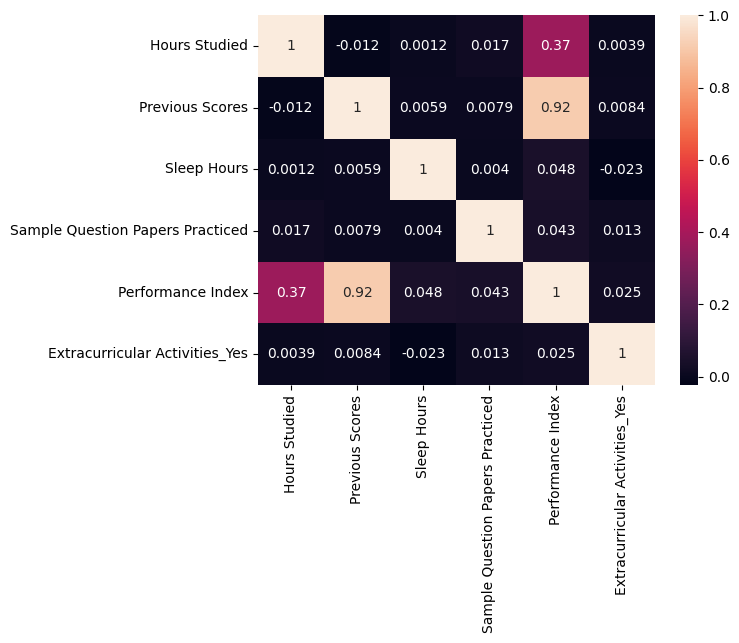

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
#цільова змінна 
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#стандартизація числових змінних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Додаємо стовпчик одиниць для intercept
X_train_final = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_final = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

Реалізація методу градієнтного спуску з нуля

In [21]:
b = np.zeros(X_train_final.shape[1]) 
epochs = 1000
learning_rate = 0.01


def compute_cost(X, y, b):
    predictions = X.dot(b)
    errors = predictions - y
    mse = (1 / len(y)) * np.sum(errors ** 2)
    return mse


def gradient_descent(X, y, b, learning_rate, epochs):
    cost_history = []  # Для відстеження змін MSE
    m = len(y)
    for _ in range(epochs):
        predictions = X.dot(b)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        b -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, b))
    return b, cost_history


# Навчання моделі
b_final, cost_history = gradient_descent(X_train_final, y_train, b, learning_rate, epochs)


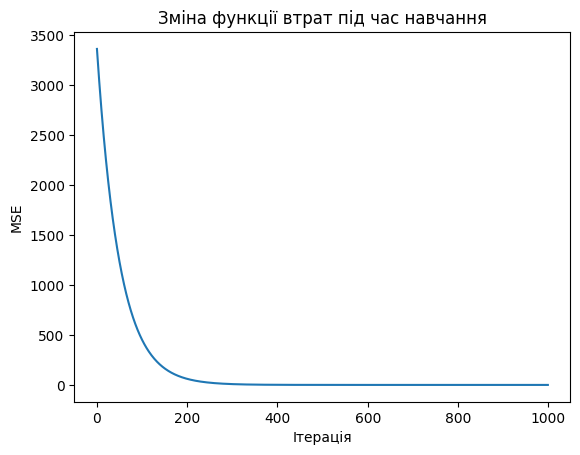

In [22]:
# Візуалізація функції втрат
plt.plot(cost_history)
plt.xlabel('Ітерація')
plt.ylabel('MSE')
plt.title('Зміна функції втрат під час навчання')
plt.show()

In [23]:
# Оцінка якості моделі
# 1. Прогнозування
y_pred = X_test_final.dot(b_final)

# 2. Розрахунок метрик
mse_test = np.mean((y_test - y_pred) ** 2)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# 3. Порівняння з бейзлайном (передбачення середнього)
y_baseline = np.full_like(y_test, np.mean(y_train))
mse_baseline = np.mean((y_test - y_baseline) ** 2)
r2_baseline = 1 - (np.sum((y_test - y_baseline) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"Test MSE: {mse_test:.4f}")
print(f"Test R^2: {r2:.4f}")
print(f"Baseline MSE: {mse_baseline:.4f}")
print(f"Baseline R^2: {r2_baseline:.4f}")

Test MSE: 4.0825
Test R^2: 0.9890
Baseline MSE: 370.7730
Baseline R^2: -0.0005


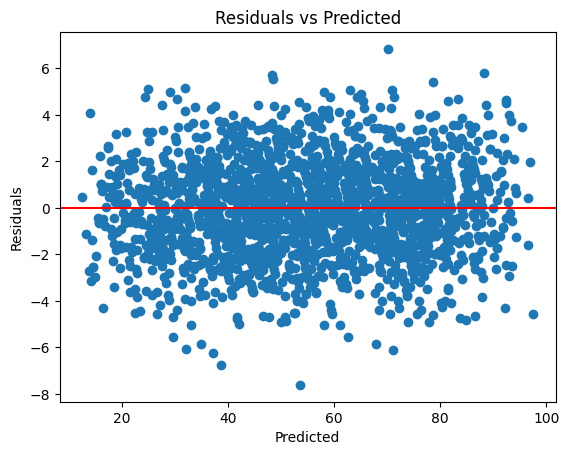

                            feature        VIF
0                     Hours Studied   4.263244
1                   Previous Scores  10.088586
2                       Sleep Hours   9.833594
3  Sample Question Papers Practiced   3.350481
4    Extracurricular Activities_Yes   1.928235


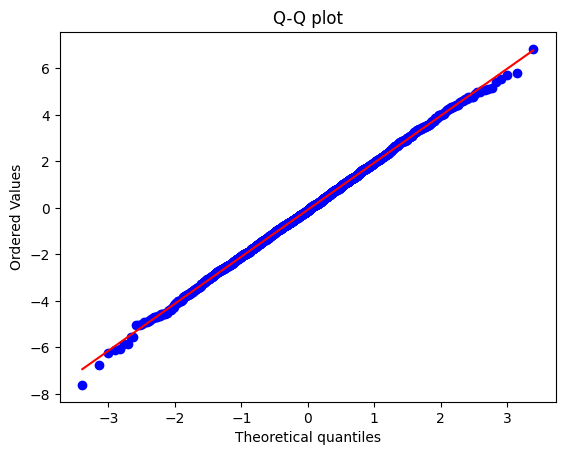

Shapiro-Wilk p-value: 0.9751
Durbin-Watson: 2.0474


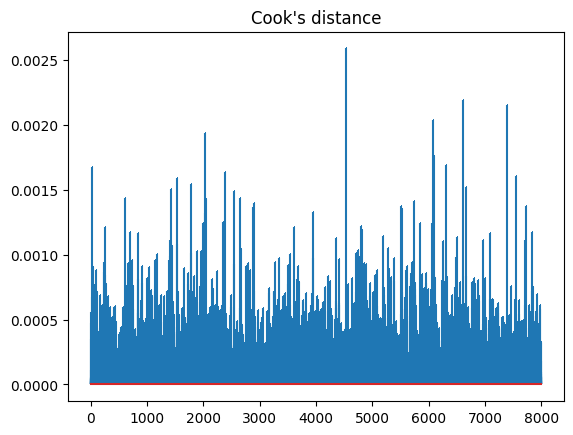

Максимальний Cook's D: 0.0026


In [24]:
# Перевірка припущень класичної лінійної регресії

# 1. Графік залишків
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

# 2. VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# 3. Q-Q plot та Shapiro-Wilk test
from scipy.stats import probplot, shapiro
probplot(residuals, plot=plt)
plt.title('Q-Q plot')
plt.show()
stat, p = shapiro(residuals)
print(f'Shapiro-Wilk p-value: {p:.4f}')

# 4. Гомоскедастичність (див. графік залишків)

# 5. Тест Дарбіна-Вотсона
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f'Durbin-Watson: {dw:.4f}')

# 6. Cook's distance
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_final).fit()
influence = model.get_influence()
cooks = influence.cooks_distance[0]
plt.stem(cooks, markerfmt=",")
plt.title("Cook's distance")
plt.show()
print(f"Максимальний Cook's D: {np.max(cooks):.4f}")


***

# Теоретичні відомості: лінійна та мультилінійна регресія


## 1. Лінійна регресія (одна змінна)

- Модель: $\hat{y} = b_0 + b_1 x$.  

- Мета: підібрати параметри $b_0, b_1$, що мінімізують помилку між $y$ та $\hat{y}$.  

- Функція втрат (MSE):  

  $$J(b_0, b_1) = \frac{1}{m} \sum_{i=1}^m (y_i - (b_0 + b_1 x_i))^2$$

- Оцінювання: за замовчуванням — метод найменших квадратів (аналітичне рішення) або градієнтний спуск.  

- Градієнтний спуск (ідея):  

  $$b \leftarrow b - \eta\, \nabla_b J(b)$$



## 2. Мультилінійна регресія (багато змінних)

- Модель: $\hat{y} = Xb = b_0 + b_1 x_1 + \dots + b_p x_p$, де $X$ — матриця ознак (з колонкою одиниць для $b_0$).  

- MSE:  

  $$J(b) = \frac{1}{m}\lVert y - Xb \rVert_2^2$$

- Закрите розв’язання (нормальні рівняння):  

  $$b = (X^\top X)^{-1} X^\top y$$

  (за умови, що $X^\top X$ невироджена).  

- Градієнт: $\nabla_b J = -\tfrac{2}{m} X^\top (y - Xb)$.  

- Регуляризація:  

  - Ridge (L2): додає $\lambda \lVert b_{1:} \rVert_2^2$ для зменшення варіативності.  

  - Lasso (L1): додає $\lambda \lVert b_{1:} \rVert_1$ для розрідження (відбір ознак).


## 3. Припущення лінійної моделі

- Лінійність зв’язку між ознаками та ціллю.  

- Незалежність помилок.  

- Гомоскедастичність (сталий розкид помилок).  

- Нормальність помилок (для коректних інтервалів/тестів).  

- Відсутність сильної мультиколінеарності (перевіряємо VIF).


## 4. Метрики якості

- MSE: середньоквадратична помилка.  

- RMSE: корінь із MSE.  

- MAE: середня абсолютна помилка.  

- $R^2$: частка поясненої дисперсії (1 — краще, 0 — як константний бейзлайн).


## 5. Масштабування та інтерсепт

- Масштабування ознак (StandardScaler) пришвидшує збіжність градієнтного спуску.  

- Додавання стовпця одиниць у $X$ забезпечує наявність вільного члена $b_0$ (зсув/інтерсепт).

# Короткий аналіз і звіт (MD)


## Дані та препроцесинг


- Джерело: `data/data.csv`. Відсутні пропуски за `df.isnull().sum()`.  

- Кодування категорій: `Extracurricular Activities` → one-hot (`_Yes`), приведено до `int`.  

- Тренувально-тестовий поділ: 80/20 з `random_state=42`.  

- Масштабування: StandardScaler на тренувальних даних; такі ж параметри застосовано до тестових.  

- Додано стовпчик одиниць до матриці ознак для інтерсепта.


## Модель і навчання


- Тип: мультилінійна регресія, навчання градієнтним спуском (з нуля).  

- Параметри тренування: `epochs=1000`, `learning_rate=0.01`.  

- Функція втрат: MSE.  

- Спостереження: крива MSE монотонно зменшується, що свідчить про збіжність оптимізації.


## Оцінка якості (Test)


- Виведені метрики: `Test MSE`, `Test R^2`.  

- Бейзлайн: константна модель (прогноз середнього тренувального `y`). Порівняння за MSE/R^2 дозволяє оцінити приріст якості над простим прогнозом.


## Діагностика припущень


- Залишки vs Прогноз: перевірка гомоскедастичності та лінійності — очікується “хмарка” без структури.  

- Нормальність помилок: Q-Q plot + Shapiro-Wilk p-value (якщо p дуже малий, нормальність не підтверджено).  

- Автокореляція: Durbin–Watson ≈ 2 бажано; значення далеко від 2 свідчать про автокореляцію.  

- Мультиколінеарність: VIF по ознаках; великі значення → колінеарність і нестабільність оцінок.


## Висновки та рекомендації


- Якщо модель перевершує бейзлайн за MSE і має адекватний R^2 — лінійна аппроксимація доречна.  

- У разі порушень припущень:  

  - розглянути трансформації ознак/цілі (лог, степеневі),  

  - додати взаємодії/поліноміальні ознаки,  

  - перейти до регуляризованих моделей (Ridge/Lasso) для зменшення варіативності,  

  - зменшити мультиколінеарність через відбір ознак або PCA.  

- За потреби — крос-валідація для більш стабільної оцінки якості.

# Глосарій термінів (короткі означення)


- Baseline (бейзлайн): проста еталонна модель для порівняння (наприклад, прогноз середнього значення цілі). Дозволяє оцінити, чи справжня модель дає приріст якості.

- Залишки (residuals): різниці між фактичними значеннями та прогнозами моделі: $e_i = y_i - \hat{y}_i$.

- MSE (Mean Squared Error): середньоквадратична помилка; середнє від квадратів залишків. Менше — краще.

- RMSE (Root Mean Squared Error): корінь із MSE; інтерпретується в одиницях цільової змінної.

- MAE (Mean Absolute Error): середня абсолютна помилка; стійкіша до викидів, ніж MSE.

- $R^2$ (коефіцієнт детермінації): частка дисперсії, поясненої моделлю. 1 — ідеально, 0 — на рівні константного бейзлайну, <0 — гірше бейзлайну.

- Гомоскедастичність: припущення про сталий розкид помилок по всьому діапазону прогнозів/ознак.

- Гетероскедастичність: порушення гомоскедастичності; дисперсія помилок змінюється з рівнем прогнозу/ознак.

- Нормальність помилок: припущення, що залишки розподілені близько до нормального закону (важливо для довірчих інтервалів і гіпотез-тестів).

- Durbin–Watson (DW): статистика, що вимірює автокореляцію залишків (≈2 — відсутність автокореляції; <2 — позитивна, >2 — негативна).

- Q–Q plot: графік порівняння квантилів залишків із нормальним розподілом; дозволяє візуально перевірити нормальність.

- Тест Shapiro–Wilk: статистичний тест на нормальність розподілу (мале p-value — нормальність відхиляється).

- Мультиколінеарність: сильний лінійний зв’язок між ознаками; призводить до нестабільності та високої варіативності оцінок коефіцієнтів.

- VIF (Variance Inflation Factor): показник мультиколінеарності для ознаки; великі значення (наприклад, >10) сигналізують про проблему.

- Стандартизація (scaling): перетворення ознак до нульового середнього та одиничної дисперсії; допомагає збіжності ГД і коректності регуляризації.

- Інтерсепт (intercept, $b_0$): вільний член моделі; відповідає зсуву прямої/гіперплощини відносно початку координат.

- Регуляризація: додавання штрафу за величину коефіцієнтів, щоб зменшити перенавчання (L2 — згладжує, L1 — може занулювати коефіцієнти).

- Overfitting (перенавчання): модель «запам’ятовує» шум у тренувальних даних і погано узагальнює на тесті.

- Underfitting (недонавчання): модель надто проста, не вловлює закономірностей у даних.

- Learning rate ($\eta$): крок оновлення в градієнтному спуску; надто великий — ризик розбігання, надто малий — повільна збіжність.

- Epoch (епоха): один повний прохід по тренувальних даних під час навчання градієнтним спуском.